# Task 1:  Simple NN with Keras

**T1.1** In this task you should implement a Neural Network Model (classification task) as described in this [tutorial](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/). This will give you a gentle introduction to the Keras library. Refer to Keras [documentation](https://keras.io/models/model/) to learn more and better understand the code.

In [1]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history=model.fit(X, y, epochs=150, batch_size=10,verbose=0)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Using TensorFlow backend.


768/768 [==============================] - 0s 32us/step
Accuracy: 76.04


***
**T1.2** The **fit** method returns a History object ([read more in the documentation](https://keras.io/visualization/)), which keeps records of training loss values and metrics values at each epoch. Use the returned History object to visualize how your model trains over epochs (i.e. to visualize the error).

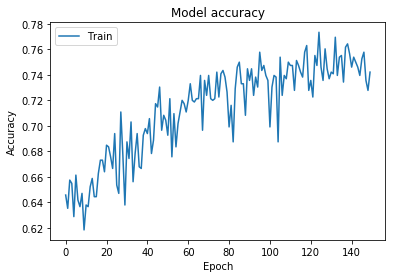

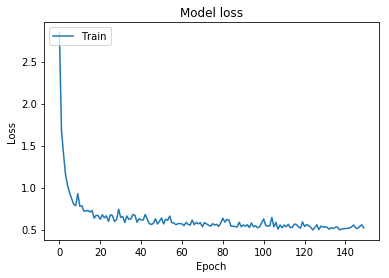

In [35]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

***
**T1.3** In the fit method you can also specify a fraction of the training data to be used for validation. The validation data will not be used for training the model, it will be used to evaluate the loss and any model metric at the end of each epoch. You can also pass validation data as an argument of the fit method. Please refer to the documentation for more details. Use the History object to visualize the train and the validation error and accuracy.

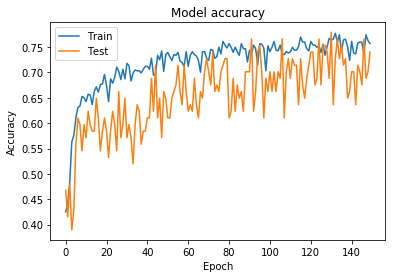

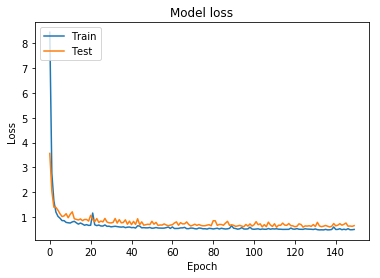

In [36]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history=model.fit(X, y, validation_split=0.1, epochs=150, batch_size=10,verbose=0)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In order to get rid of the randomness in your code you need to set the Numpy seed and Tensorflow seeds. This can be done as follows.

In [37]:
from numpy.random import seed
from tensorflow import set_random_seed

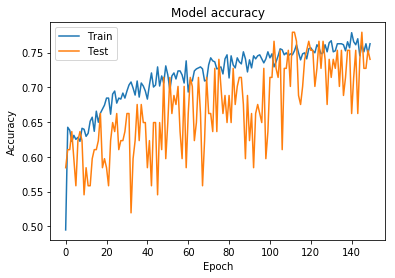

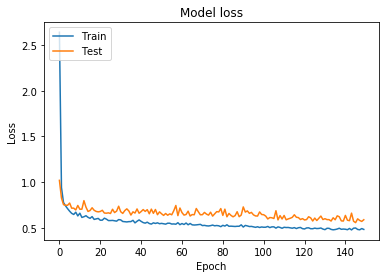

In [38]:
seed(0)
set_random_seed(0)

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history=model.fit(X, y, validation_split=0.1, epochs=150, batch_size=10,verbose=0)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Task 2: Evaluating performance with cross-validation

**T2.1** In this task you should change the code so that the model is evaluated with 5 cross validation using KFold as in previous practicals. Report the final accuracy (mean accuracy obtain on the validation dataset across all the folds).

In [41]:
import numpy as np
from sklearn.model_selection import KFold
acc=[]

kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    # define the keras model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer='adam')

    # fit the keras model on the dataset
    history=model.fit(X[train_index], y[train_index], epochs=150, batch_size=10,verbose=0)
    _,accuracy = model.evaluate(X[test_index], y[test])
    acc.append(accuracy)
mean_acc = sum(acc)/len(acc)
print('Mean accuracy: ',mean_acc)

153/153 [==============================] - 0s 2ms/step
Mean accuracy:  0.7292165517807007


***
**T2.1 (Calculating F1)** Keras does not have built in the F1 metric. However, we can use sklearn.metrics to calculate it. In order to do this, you have to obtain the predictions of you NN calling method predict. You will have to convert the predictions into class labels. You can either use np.where for binary classification, or np.argmax for multi-class classification problem. Finally, you can use [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) to calculate the F1 for the predictions of your model. Change your code so that it reports the F1 score instead of the accuracy. 

In [42]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    # define the keras model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer='adam')

    # fit the keras model on the dataset
    history=model.fit(X[train_index], y[train_index], epochs=150, batch_size=10,verbose=0)
    # make class predictions with the model
    predictions = model.predict_classes(X[test_index])
    f1=f1_score(y_true=y[test_index], y_pred=predictions, average='macro')
    print(f1)

0.6323232323232324
0.7186538461538461
0.6478425134221515
0.7412262156448203
0.6707605101558809


# Task 3: Trying different training settings

Modify the NN model to see how this affect its performance. Here are some modifications, which could be done:

- Change the batch size 
- Increase number of epochs
- Try different [activation functions](https://keras.io/activations/)
- Change number of neurons in the output and hidden layers
- Add additional hidden layers
- Try different [parameters initializers](https://keras.io/initializers/) 
- Try different optimizers

What is the best accuracy you can get? Have you made some interesting observations?

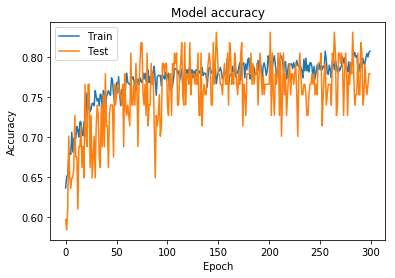

0.7450980544090271


0.74509805

In [58]:
import keras
seed(0)
set_random_seed(0)

model = Sequential()
model.add(Dense(20, input_dim=8, kernel_initializer='random_uniform',activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dense(10, kernel_initializer='random_uniform',activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dense(8, kernel_initializer='random_uniform',activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history=model.fit(X, y, validation_split=0.1, epochs=300, batch_size=10,verbose=0)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
print(accuracy)
0.74509805

# Task 4: Solving regressiong problem

Re-implement the code so that it can be applied to solve a regression problem. Use Boston Housing dataset, which can be obtained from sklearn.datasets. Construct a NN model with architecture of your choice and evaluate it using cross validation.

In [61]:
from sklearn import datasets
X, y = datasets.load_boston(return_X_y=True)

In [70]:
kf = KFold(n_splits=5)
mse=[]
mae=[]
for train_index, test_index in kf.split(X):
    # define the keras model
    seed(0)
    set_random_seed(0)

    model = Sequential()
    model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(1, activation='linear'))

    # compile the keras model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse','mae'])

    # fit the keras model on the dataset
    history=model.fit(X[train_index], y[train_index], epochs=150, batch_size=10,verbose=0)
    # make class predictions with the model
    _,e1,e2 = model.evaluate(X[test_index], y[test_index])
    mse.append(e1)
    mae.append(e2)
#mean_acc = sum(acc)/len(acc)
print('MSE: ',sum(mse)/len(mse))
print('MAE: ',sum(mae)/len(mae))
MSE:  71.920458984375
MAE:  5.767112874984742

101/101 [==============================] - 0s 4ms/step
MSE:  47.53649082183838
MAE:  4.977910947799683
